In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd
import datetime as dt


In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [86]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/maria/Desktop/Bootcamp/SQL/CHALLENGE 10/Starter_Code/Resources/hawaii.sqlite")

In [87]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the reflected tables
Measurement = Base.classes.measurement
Station = Base.classes.station

C:\Users\maria\AppData\Local\Temp\ipykernel_20904\4175347347.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [88]:
# View all of the classes that automap found
classes = Base.classes.keys()
classes


['station', 'measurement']

In [89]:
# Save references to each table
Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station


C:\Users\maria\AppData\Local\Temp\ipykernel_20904\3330262970.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [91]:
# Find the most recent date in the data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date


'2017-08-23'

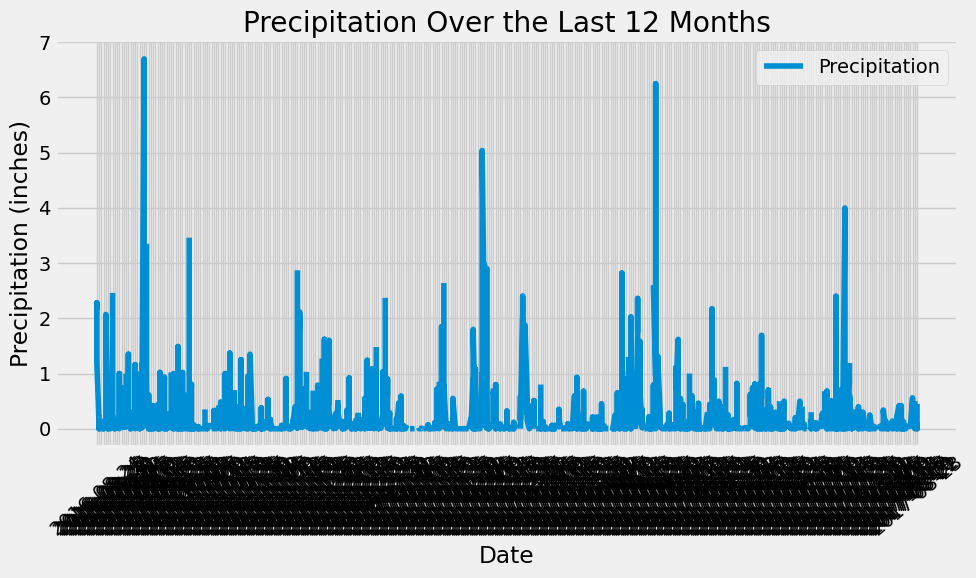

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.xticks(rotation=40)
plt.legend()
plt.tight_layout()
plt.show()


In [93]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [94]:
# Design a query to calculate the total number of stations in the dataset
# Perform a query to calculate the total number of stations
total_stations = session.query(func.count(func.distinct(Station.station))).scalar()
print("Total number of stations:", total_stations)


Total number of stations: 9


In [95]:
from sqlalchemy import desc

# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(desc(func.count(Measurement.station))).all()

# results
for station, count in active_stations:
    print(f"{station}, {count}")


USC00519281, 2772
USC00519397, 2724
USC00513117, 2709
USC00519523, 2669
USC00516128, 2612
USC00514830, 2202
USC00511918, 1979
USC00517948, 1372
USC00518838, 511


In [96]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]  

temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station).all()

#results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
print(f"{lowest_temp} F")
print(f"{highest_temp} F")
print(f"{avg_temp} F")


54.0 F
85.0 F
71.66378066378067 F


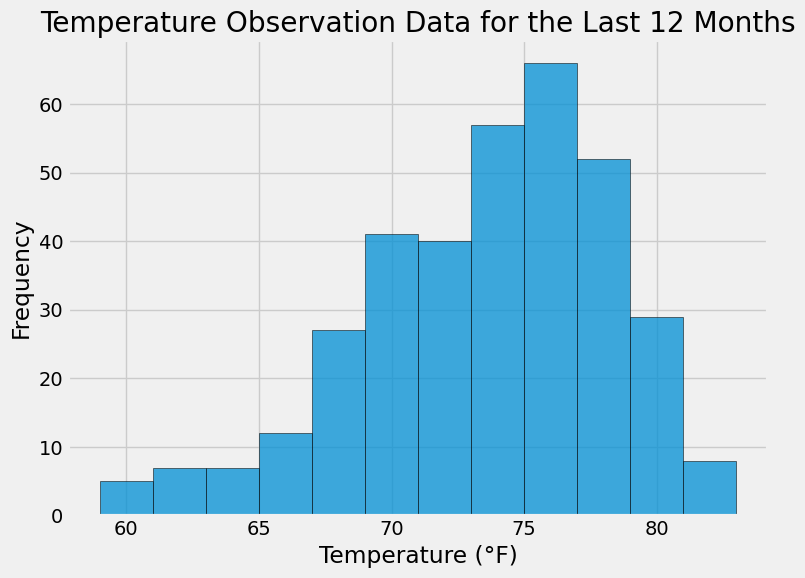

In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago = most_recent_date - dt.timedelta(days=365)

temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, alpha=0.75, edgecolor='black')
plt.title('Temperature Observation Data for the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
# Close the session
session.close()
